# How to calculate distances on the Earth

Here, we demonstrate a few different approaches to calculate the distance between coordinates on the Earth's surface.

Let's define some arbitrary coordinates

In [3]:
# lat1, lon1, lat2, lon2 = (16, -60, 16, -45)
lat1, lon1, lat2, lon2 = (51.53, -0.08, 43.17, 132)

and see how this looks like for different transformations.

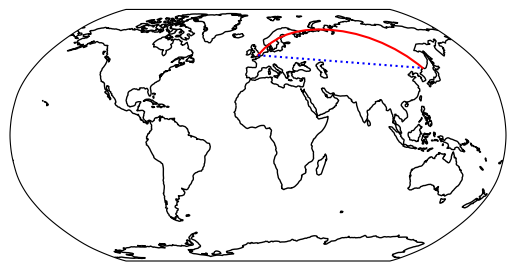

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()

plt.plot((lon1, lon2), (lat1, lat2), transform=ccrs.Geodetic(), color='red',)
plt.plot((lon1, lon2), (lat1, lat2), transform=ccrs.PlateCarree(), color='blue', ls=':');

Depending on the projection, there are, apparently, different ways to calculate the distance between two points on the Earth's surface. Here, we will demonstrate a few different approaches to calculate the distance between coordinates on the Earth's surface.

## Pyproj
The first example makes use of the {class}`pyproj.Geod` object. 
Its method {meth}`~pyproj.Geod.geometry_length` accepts a {obj}`shapely.LineString` object and returns the distance in meters.

In [6]:
from shapely import LineString
from pyproj import Geod

# only for the first example
ls = LineString([(lon1, lat1), (lon2, lat2)])   # ← keep in mind the reverse order compared to the other following examples!
geod = Geod(ellps="WGS84")

In [7]:
# %%timeit  # 12 µs ± 22.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
geod.geometry_length(ls)/1e3

8542.610993959972

## Geopy
The second to fourth example make use of the {mod}`geopy` library.
All methods accept tuples of (lat, lon) values.
The fastest results are obtained with the function {class}`~geopy.distance.great_circle`.
However, one should keep in mind that this uses a very simplified "model" of the Earth.
More accurate results are obtained with the methods {obj}`~geopy.distance.distance` and {class}`~geopy.distance.geodesic`.

In [8]:
from geopy import distance

# %%timeit  # 6.7 µs ± 11.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
distance.great_circle((lat1, lon1), (lat2, lon2)).km

8518.581851143874

In [9]:
# %%timeit  # 141 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
distance.distance((lat1, lon1), (lat2, lon2)).km

8542.610993959972

In [10]:
# %%timeit  # 143 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
distance.geodesic((lat1, lon1), (lat2, lon2), ellipsoid='WGS-84').km

8542.610993959972

## Conclusions
Depending on how many coordinates you have, you might want to choose a method with a shorter runtime.
However, if accuracy is important, you should choose one of the other methods.
